## Table of Contents
1. [Import and Clean Data](#1.-Import-and-Clean-Data)
    - [Clean data](#1.1-Clean-data)
2. [Exploratory Data Analysis (EDA)](#2.-Exploratory-Data-Analysis-(EDA))
3. [Transformation](#3.-Transformation)
    - [Dummy encoding](#3.1-Dummy-encoding)
        - [Variable correlation](#3.1.1-variable-correlation)
    - [Standardization](#3.2-Standardization)
    - [Dataset splitting](#3.3-Dataset-splitting)
    - [SMOTE](#3.4-SMOTE)
4. [Modeling](#4.-Modeling)
5. [Evaluation](#5.-Evaluation)
    - [Interpreting the Coefficients](#5.1-Interpreting-the-Coefficients)
    - [Visualizing model performance](#5.2-Visualizing-model-performance)
6. [Application](#6.Application)

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import imblearn
from imblearn.over_sampling import SMOTE 
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, f1_score, confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import sys
import warnings
warnings.filterwarnings("ignore")

In [2]:
# python and library version
print('Python version: ', sys.version)
print('Numpy version: ', np.__version__)
print('Pandas version: ', pd.__version__)
print('Matplotlib version: ', matplotlib.__version__)
print('Seaborn version: ', sns.__version__)
print('Imblearn version:', imblearn.__version__)
print('Scikit-learn version: ', sklearn.__version__)

Python version:  3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)]
Numpy version:  1.26.1
Pandas version:  2.1.2
Matplotlib version:  3.8.1
Seaborn version:  0.13.0
Imblearn version: 0.11.0
Scikit-learn version:  1.3.2


## 1. Import and Clean Data

In [3]:
data = pd.read_csv("data/general_data.csv",sep=",")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Attrition                4410 non-null   object 
 1   Age                      4410 non-null   int64  
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

```Attrition``` is a dichotomous ("Yes/No") field that indicates if the employee left the organization. This variable will serve as our response variable. The other columns listed are potential predictor variables. We should do some exploratory data analysis to see which variables have the most potential for modeling. 

In [5]:
pd.set_option("display.max_columns", None)
data.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,No,51,Travel_Rarely,Sales,5,2,Life_Sciences,1,1,Female,1,Healthcare_Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,1,3,3.0,4.0,3.0
1,No,32,Travel_Frequently,Research_Development,14,4,Other,1,3,Male,4,Sales_Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,2,3.0,2.0,2.0
2,No,38,Non-Travel,Research_Development,2,5,Life_Sciences,1,4,Male,3,Human_Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,3,4,2.0,2.0,4.0
3,No,32,Travel_Rarely,Research_Development,8,1,Medical,1,5,Male,1,Sales_Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,1,3,4.0,4.0,3.0
4,No,46,Travel_Rarely,Research_Development,6,3,Life_Sciences,1,6,Female,4,Research_Director,Married,40710,3.0,Y,13,8,0,28.0,5,7,7,7,3,3,4.0,3.0,2.0


In [6]:
data.shape

(4410, 29)

In [7]:
data.describe().round(1)

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4391.0,4410.0,4410.0,4410.0,4401.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4385.0,4390.0,4388.0
mean,36.9,8.0,2.9,1.0,2205.5,2.1,65029.3,2.7,14.4,8.0,0.8,11.3,2.8,7.0,2.2,4.1,3.0,3.0,2.9,3.1,3.0
std,9.1,7.1,1.0,0.0,1273.2,1.1,47068.9,2.5,4.2,0.0,0.9,7.8,1.3,6.1,3.2,3.6,0.6,0.9,1.1,0.9,0.9
min,18.0,1.0,1.0,1.0,1.0,1.0,10090.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
25%,30.0,2.0,2.0,1.0,1103.2,1.0,29110.0,1.0,12.0,8.0,0.0,6.0,2.0,3.0,0.0,2.0,3.0,2.0,2.0,2.0,2.0
50%,36.0,6.0,3.0,1.0,2205.5,2.0,49190.0,2.0,14.0,8.0,1.0,10.0,3.0,5.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0
75%,43.0,12.0,4.0,1.0,3307.8,3.0,83800.0,4.0,17.0,8.0,1.0,15.0,3.0,9.0,3.0,7.0,3.0,4.0,4.0,4.0,4.0
max,60.0,35.0,5.0,1.0,4410.0,5.0,199990.0,9.0,25.0,8.0,3.0,40.0,6.0,40.0,15.0,17.0,4.0,4.0,4.0,4.0,4.0


By looking at the descriptive, we can quickly see the following statistic is reasonable:
- max, min
- mean

For instant, age is between 18 and 60 which make sense to be employee data.

Also, we can focus on columns that lack variance necessary for value in prediction. Since ```EmployeeCount``` and ```StandardHours``` both have no variation, this makes them poor candidates for prediction.

### 1.1 Clean data

In [8]:
data.isnull().sum()

Attrition                   0
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
PerformanceRating           0
JobInvolvement              0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            22
dtype: int64

My approach of handling missing data is using their mean.

In [9]:
data=data.fillna(data.mean(numeric_only=True))

In [10]:
data.isnull().any()

Attrition                  False
Age                        False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked         False
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears          False
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
PerformanceRating          False
JobInvolvement             False
EnvironmentSatisfaction    False
JobSatisfaction            False
WorkLifeBalance            False
dtype: bool

## 2. Exploratory Data Analysis (EDA)

We will first drop the columns that is not helpful for modeling employee turnover. ```EmployeeCount```, ```StandardHours```, and ```Over18``` should be dropped as they have no variation. ```EmployeeID``` is only used to identify the employee and has no other value.

In [11]:
data.drop(['EmployeeCount','EmployeeID','StandardHours','Over18'],axis=1,inplace=True)

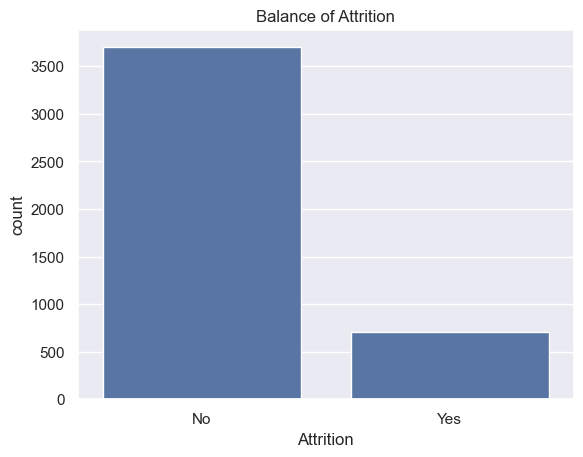

In [12]:
sns.countplot(x = "Attrition",data=data)
plt.title('Balance of Attrition')
plt.show()

We see that our response variable (attrition) has more non-attrition of an employee than attrition of employees. Specifically, only 16% of our data set consists of attrition records. This imbalance can hurt the overall model performance, so we will later use SMOTE to fix this issue in the transformation section.

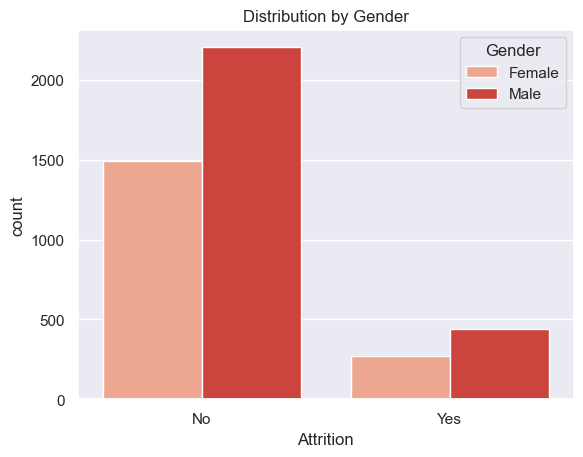

In [13]:
sns.countplot(x = "Attrition",data=data,hue="Gender", palette="Reds")
plt.title('Distribution by Gender')
plt.show()

In [14]:
#Bin the age variable into buckets for easier EDA
data['Age_Bin']=pd.cut(x = data['Age'],
                        bins = [0,30,40,50,60], 
                        labels = ['18-30', '30-40', '40-50','50-60'])

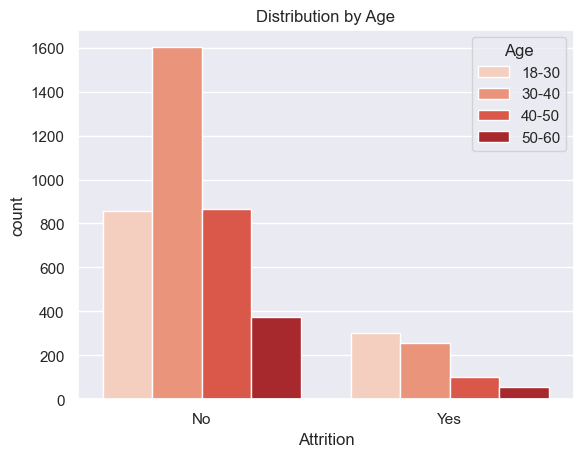

In [15]:
sns.countplot(x = "Attrition",data=data,hue="Age_Bin", palette="Reds")
plt.legend(title='Age')
plt.title('Distribution by Age')
plt.show()

In [16]:
data.drop('Age_Bin', axis=1, inplace=True)

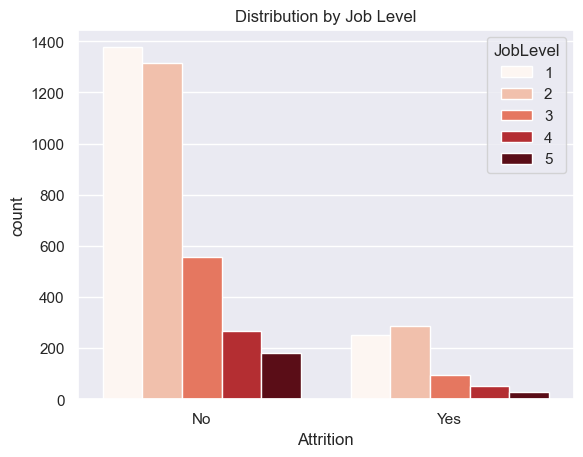

In [17]:
sns.countplot(x = "Attrition",data=data,hue="JobLevel", palette="Reds")
plt.title('Distribution by Job Level')
plt.show()

Let's transform our dependent variable (attrition) from 'yes/no' to '1/0' for better handling.

In [18]:
label_encoder_y=LabelEncoder()
data['Attrition']=label_encoder_y.fit_transform(data['Attrition'])

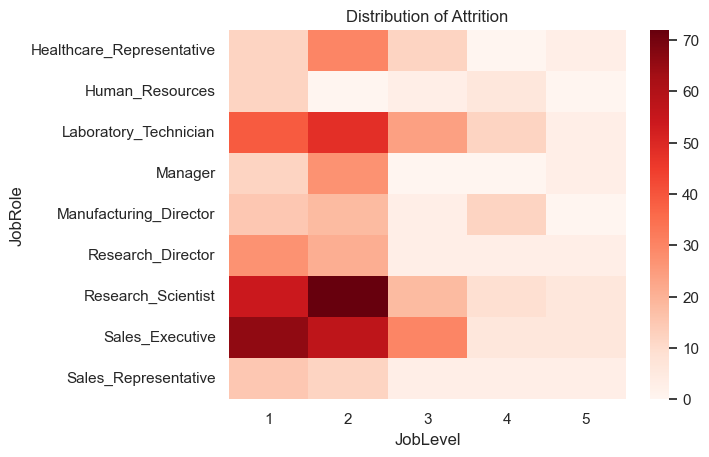

In [19]:
import matplotlib.colors as mcolors
pivot = data.pivot_table(values='Attrition', index='JobRole', columns='JobLevel', aggfunc=sum)
sns.heatmap(pivot, cmap=sns.color_palette("Reds", as_cmap=True))
plt.title('Distribution of Attrition')
plt.show()

The bar charts and heatmap visualization effectively highlights that attrition is not uniformly distributed across the organization. Specifically, it underscores a significant concentration of turnover among Research Scientists and Sales Executives, particularly at the entry-level positions and those who are young. This pattern suggests that our early-career employees in these roles are the most vulnerable to attrition.

## 3. Transformation

This part will transform data to better fit the machine learning model by:
1. dummy encoding
2. standardization
3. dataset splitting
4. SMOTE

Since some of our data is category, we will first use dummy encoding to transform these category column into numeric in order to pass to the machine learning model.

### 3.1 Dummy encoding

In [20]:
columns_to_dummy = ['Gender', 'JobRole', 'BusinessTravel','Education','EducationField',
                                    'JobLevel','MaritalStatus','Department','StockOptionLevel']
df = pd.get_dummies(data, columns=columns_to_dummy, drop_first=True)

For reference, let's view the data in the categorical predictors

In [21]:
print(data['BusinessTravel'].unique())
print(data['EducationField'].unique())
print(data['Gender'].unique())
print(data['Department'].unique())
print(data['JobRole'].unique())
print(data['MaritalStatus'].unique())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Life_Sciences' 'Other' 'Medical' 'Marketing' 'Technical_Degree' 'HR']
['Female' 'Male']
['Sales' 'Research_Development' 'Human_Resources']
['Healthcare_Representative' 'Sales_Executive' 'Human_Resources'
 'Research_Director' 'Laboratory_Technician' 'Manufacturing_Director'
 'Sales_Representative' 'Manager' 'Research_Scientist']
['Married' 'Single' 'Divorced']


After dummy encoding, we can investigate the correlation between attrition rate and other variables.

### 3.1.1 variable correlation

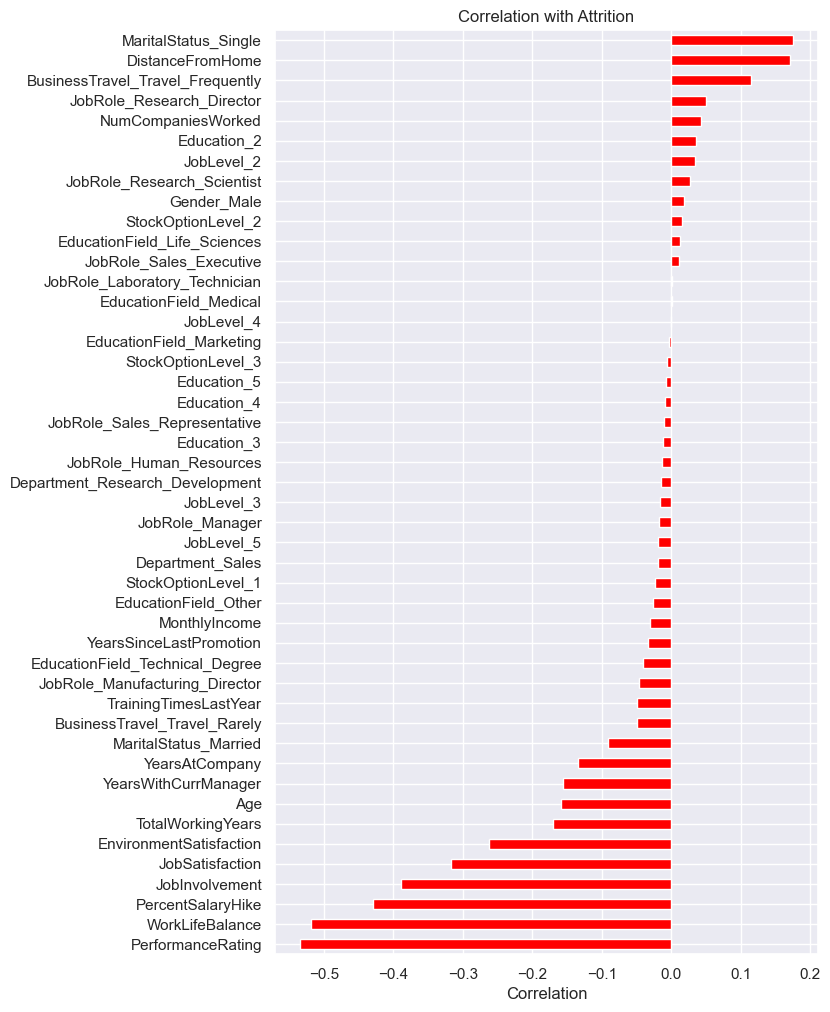

In [22]:
correlation_series = df.corr()['Attrition'].sort_values()
correlation_series = correlation_series.drop('Attrition')
plt.figure(figsize=(7, 12))
correlation_series.plot(kind='barh', color='red')
plt.title('Correlation with Attrition')
plt.xlabel('Correlation')
plt.show()

This chart suggest that these are the factors that are highly correlated with attrition:
- low performance rating
- work life imbalance
- low percent salary hike
- low job involvement
- low job satisfaction
- low environment satisfaction

These can be the potential variables used in the machine learning model.

### 3.2 Standardization

We want to compare the magnitude of the coefficients in the machine learning model. If the underlying variables have different units of measurement and variances (e.g. age vs. monthly income), then the magnitude of the coefficients are not directly comparable. So we standardize the numeric columns, but exclude the binary column.

In [23]:
# standardization
columns_to_standardize = [
    'Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 
    'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 
    'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 
    'PerformanceRating', 'JobInvolvement', 'EnvironmentSatisfaction', 
    'JobSatisfaction', 'WorkLifeBalance'
]
scaler = StandardScaler()
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

### 3.3 Dataset splitting

Dataset is split into training [70%], validation [15%], and test set [15%] for machine learning.

In [24]:
def train_validate_test_split(df, train_percent=.7, validate_percent=.15, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test

In [25]:
train, validate, test = train_validate_test_split(df)

### 3.4 SMOTE

As said before, in order to fix the imbalance issue in our response variable (Attrition), we use SMOTE to balance it.

In [26]:
y = train['Attrition']
X = train.drop(['Attrition'], axis = 1)
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)
print(f'''Shape of X before SMOTE: {X.shape}
        Shape of X after SMOTE: {X_sm.shape}''')

Shape of X before SMOTE: (3087, 46)
        Shape of X after SMOTE: (5174, 46)


In [27]:
# check that response variable is now balanced
y_sm.mean()

0.5

In [28]:
#Remerge the data
train_smote = pd.concat([y_sm, X_sm], axis=1)
train_smote.shape

(5174, 47)

## 4. Modeling

Since attrition is a binary variable, we will use logistic regression, which is suitable and simple to interpret.

We first split the independent variables and response variable from the train, validate, and test set.

In [29]:
ind_var = ['PerformanceRating', 'WorkLifeBalance', 'PercentSalaryHike', 'JobInvolvement', 'JobSatisfaction', 'EnvironmentSatisfaction']

X_train = train_smote[ind_var]
y_train = train_smote['Attrition']

X_validate = validate[ind_var]
y_validate = validate['Attrition']

X_test = test[ind_var]
y_test = test['Attrition']

In our analysis, the trade-off between Type I and Type II errors is critical. Misclassifying an employee as staying (Type II error) is more detrimental than falsely predicting their departure (Type I error). Thus, minimizing Type II errors is our priority. We will focus on optimizing recall as our performance metrics, adjusting our model's hyperparameter on the validation set to maximize these measures.

In [30]:
def fit_model(penalty, C, class_weight, solver, max_iter, data='validate'):
    if data == 'validate':
        X = X_validate
        y = y_validate
    elif data == 'test':
        X = X_test
        y = y_test
    else:
        raise NameError('invalid data input')

    # initialize hyperparameter
    log_reg = LogisticRegression(penalty=penalty,
                                C=C,
                                class_weight=class_weight,
                                solver=solver,
                                max_iter=max_iter)

    # fit model with training data
    log_reg.fit(X_train, y_train)

    # predict on the validation data
    y_pred = log_reg.predict(X)

    # calculate recall
    recall = recall_score(y, y_pred)

    return log_reg, recall

In [31]:
print(fit_model(penalty='l2', C=0.1, class_weight=None, solver='lbfgs', max_iter=100)[1])
print(fit_model(penalty='l2', C=0.001, class_weight=None, solver='lbfgs', max_iter=100)[1])
print(fit_model(penalty='l1', C=0.001, class_weight=None, solver='liblinear', max_iter=100)[1])
print(fit_model(penalty='l1', C=0.01, class_weight='balanced', solver='liblinear', max_iter=100)[1])

0.8275862068965517
0.8275862068965517
0.8390804597701149
0.8505747126436781


From this tuning, we find that `penalty='l1', C=0.01, class_weight='balanced', solver='liblinear', max_iter=100` give the best recall. Let's pass this to test set to see its recall.

In [32]:
model, recall = fit_model(penalty='l1', C=0.01, class_weight='balanced', solver='liblinear', max_iter=100, data='test')
print(recall)

0.9193548387096774


## 5. Evaluation

### 5.1 Interpreting the Coefficients

In [33]:
coef = dict(zip(ind_var, model.coef_[0]))
coef

{'PerformanceRating': -0.8476457731524698,
 'WorkLifeBalance': -1.145233770851415,
 'PercentSalaryHike': -0.5438586975848675,
 'JobInvolvement': -0.6040496948926853,
 'JobSatisfaction': -0.540834055558806,
 'EnvironmentSatisfaction': -0.3171428130390066}

To interpret coefficient of a logistic regression model, 1 unit change in the independent variable produce the coefficient change in the response variable (Attrition). Note that our independent variable is standardized. So, here it may not have the same intuition but we can use this coefficient to compare their strength of impact on attrition.

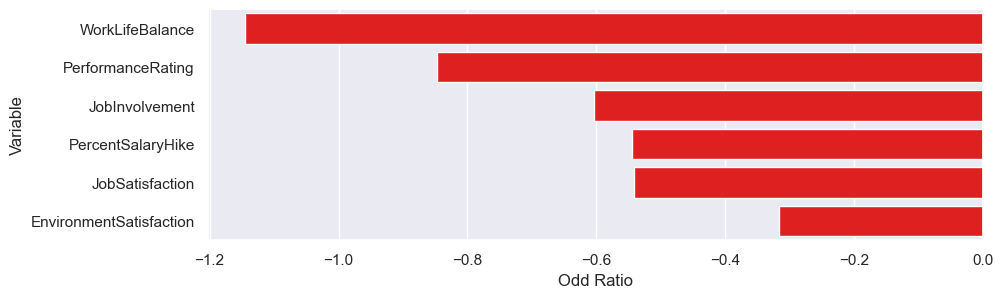

In [34]:
coef_df = pd.DataFrame(list(coef.items()), columns=['Variable', 'Odd Ratio'])

plt.figure(figsize=(10, 3))
sns.barplot(x='Odd Ratio', y='Variable', data=coef_df, 
            orient='h', 
            color='red',
            order=coef_df.sort_values('Odd Ratio', ascending=True).Variable)

plt.xlabel('Odd Ratio')
plt.show()

### 5.2 Visualizing model performance

We can produce confusion matrices to visualize the TP, FP, TN, and FN.

In [35]:
predict = model.predict(X_test)
cm = confusion_matrix(y_test, predict)
print ("Confusion Matrix : \n", cm)
print('Test accuracy = ', accuracy_score(y_test, predict))

Confusion Matrix : 
 [[496  42]
 [ 10 114]]
Test accuracy =  0.9214501510574018


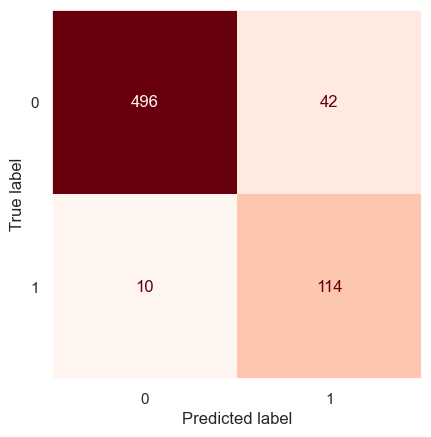

In [36]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Reds, colorbar=False)
plt.grid(False)
plt.show()

We can use classification report to provide a view into precision, recall, and f1-score. It provides these values for the overall model and disaggreagted by response variable outcome (0,1).

In [37]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       538
           1       0.73      0.92      0.81       124

    accuracy                           0.92       662
   macro avg       0.86      0.92      0.88       662
weighted avg       0.93      0.92      0.92       662



The model is performing very well on the majority class with high precision,  recall and f1-score. Performance on the minority class is still good, especially the recall. The model is adept at capturing the positive cases for the minority class, which is the goal in our scenarios, as the cost of false negative is higher than false positive.

Visualizing Area Under the Curve (AUC) is particularly useful for evaluating classifiers on imbalanced datasets because it focuses on the rates (proportions) rather than absolute counts.

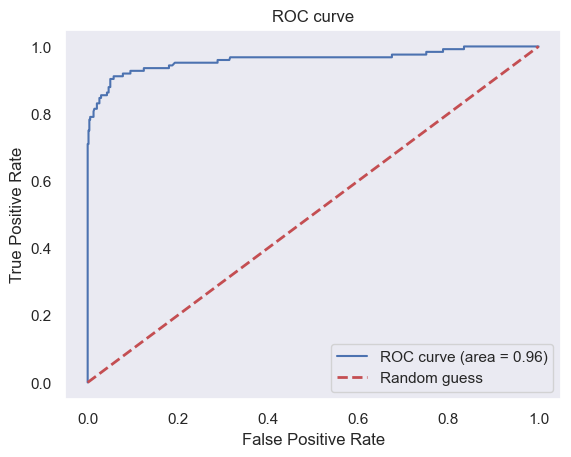

In [38]:
# probability estimates of the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# computes the ROC AUC score
auc = roc_auc_score(y_test, y_probs)

# compute true positive and false positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Create ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.legend()
plt.show()

## 6.Application

Recall that we have do some transformation our dataset, such as dummy encoding and standardization, before passing them to the model. Therefore, when we apply this model in real data, we need to transform the data with the same way and same scale before passing to the trained model for prediction.

In [39]:
def predict_real_data(real_data):
    # dummy encoding
    transformed_data = pd.get_dummies(real_data, columns=columns_to_dummy, drop_first=True)
    # use the same scale to standardize real data
    standardized_values = scaler.transform(transformed_data[columns_to_standardize])
    standardized_data = pd.DataFrame(standardized_values, columns=columns_to_standardize, index=transformed_data.index)
    standardized_data = standardized_data[ind_var]
    # pass to model for prediction
    prediction = model.predict(standardized_data)

    return prediction

In [40]:
# create sample data to act as real data
data_for_prediction = data.sample(n=20)
# make prediction
prediction = predict_real_data(data_for_prediction)
# combine prediction result to the data frame
data_for_prediction['Prediction'] = prediction
data_for_prediction

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Prediction
2291,0,33,Travel_Frequently,Sales,23,4,Life_Sciences,Female,1,Human_Resources,Single,31800,1.0,14,1,15.0,2,15,8,12,3,4,3.0,3.0,3.0,0
950,0,43,Travel_Rarely,Research_Development,2,3,Medical,Male,1,Research_Scientist,Married,90940,1.0,12,1,10.0,0,10,0,9,3,2,2.0,4.0,3.0,0
2400,0,38,Travel_Rarely,Sales,3,4,Life_Sciences,Male,1,Manufacturing_Director,Single,70820,1.0,14,0,2.0,3,2,2,1,3,2,2.0,2.0,3.0,1
807,0,45,Travel_Rarely,Research_Development,1,4,Life_Sciences,Male,1,Research_Director,Single,29420,1.0,22,1,21.0,4,21,8,6,4,3,4.0,3.0,3.0,0
552,0,44,Travel_Rarely,Research_Development,2,4,Life_Sciences,Male,2,Research_Scientist,Divorced,47070,1.0,17,0,26.0,4,25,14,13,3,3,1.0,3.0,4.0,0
1772,0,34,Travel_Rarely,Sales,7,4,Medical,Female,2,Laboratory_Technician,Married,27410,0.0,15,1,2.0,3,1,0,0,3,3,2.0,2.0,3.0,0
2916,0,48,Non-Travel,Sales,2,1,Life_Sciences,Male,2,Sales_Executive,Single,23700,2.0,11,0,27.0,3,5,2,1,3,2,4.0,4.0,4.0,0
2735,0,54,Travel_Rarely,Research_Development,14,4,Medical,Female,2,Laboratory_Technician,Divorced,49630,9.0,15,1,9.0,2,5,1,4,3,4,3.0,1.0,3.0,0
1215,0,32,Travel_Rarely,Human_Resources,10,4,Life_Sciences,Female,3,Manufacturing_Director,Married,85640,2.0,16,1,6.0,2,4,1,2,3,4,4.0,3.0,3.0,0
1427,0,42,Travel_Rarely,Research_Development,22,4,Life_Sciences,Female,2,Manufacturing_Director,Married,26450,1.0,15,0,10.0,5,10,2,2,3,2,4.0,4.0,3.0,0
